In [1]:
import sys, os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
INDIR = r'..\UC Davis\2015_Base'

In [3]:
hh = pd.read_csv(os.path.join(INDIR,'_household_3.dat'), sep='\t')
trips = pd.read_csv(os.path.join(INDIR,'_trip_3.dat'), sep='\t')

In [4]:
trips = pd.merge(hh[['hhno','income_group_ami','hhdist','hhvehs']], trips, on='hhno')

In [5]:
tours = (trips.groupby(['hhno','income_group_ami','hhdist','hhvehs','tour_id'], as_index=False)
              .agg({'travdist':'sum','travcost':'sum','travtime':'sum','trexpfac':'sum'})
              .rename(columns={'trexpfac':'trips'}))

In [6]:
tours['tours'] = 1

In [7]:
by_income = (tours.groupby('income_group_ami')
                  .agg({'travdist':'sum','travcost':'sum','travtime':'sum','trips':'sum','tours':'sum','hhno':'nunique'})
                  .rename(columns={'hhno':'households'}))

In [8]:
by_income['trips_per_tour'] = by_income['trips'] / by_income['tours']
by_income['avg_tour_travcost'] = by_income['travcost'] / by_income['tours']
by_income['avg_trip_travcost'] = by_income['travcost'] / by_income['trips']

In [9]:
by_income.loc[['very_low','low','moderate','middle','high'],:].round(2)

,travdist,travcost,travtime,trips,tours,households,trips_per_tour,avg_tour_travcost,avg_trip_travcost
income_group_ami,,,,,,,,,
very_low,27746336.44,3688522.57,9.367926e+07,5402047,2210025,704374,2.44,1.67,0.68
low,19714160.70,2627281.66,5.668268e+07,3151129,1263228,331888,2.49,2.08,0.83
moderate,32987163.77,4402553.13,9.089749e+07,4845063,1923312,481795,2.52,2.29,0.91
middle,15332280.47,2047693.57,4.104363e+07,2133450,841023,210298,2.54,2.43,0.96
high,70471517.84,9549709.05,1.865015e+08,9514527,3717400,925726,2.56,2.57,1.00


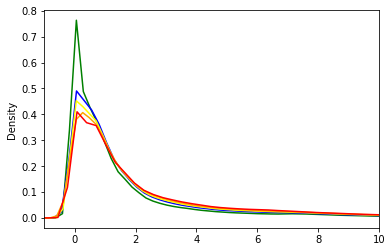

In [10]:
fig, ax = plt.subplots()
tours.loc[tours['income_group_ami'].eq('very_low'),'travcost'].plot.density(ax=ax, color='green')
tours.loc[tours['income_group_ami'].eq('low'),'travcost'].plot.density(ax=ax, color='blue')
tours.loc[tours['income_group_ami'].eq('moderate'),'travcost'].plot.density(ax=ax, color='yellow')
tours.loc[tours['income_group_ami'].eq('middle'),'travcost'].plot.density(ax=ax, color='orange')
tours.loc[tours['income_group_ami'].eq('high'),'travcost'].plot.density(ax=ax, color='red')
plt.xlim([-1, 10])
plt.show()